<a href="https://colab.research.google.com/github/sakshisubedi/CSE_256_NLP/blob/main/knn/ag_news_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CSE_256_Project

/content/drive/MyDrive/CSE_256_Project


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df_train = pd.read_csv("./aig_dataset/train.csv")
df_test = pd.read_csv("./aig_dataset/test.csv")

In [5]:
df_train.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [6]:
df_train.columns, df_test.columns

(Index(['Class Index', 'Title', 'Description'], dtype='object'),
 Index(['Class Index', 'Title', 'Description'], dtype='object'))

In [7]:
df_test.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [8]:
import re

def clean_text_function(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)

    return text


In [9]:
# df_train['text'] = df_train['Title'] + df_train['Description']
# df_test['text'] = df_test['Title'] + df_test['Description']

df = pd.merge(df_train, df_test, on=['Class Index', 'Title', 'Description'], how="outer")
len(df)

# print(df_train.merge(df_test))

127600

In [10]:
df['text'] = df['Title'] + df['Description']

In [11]:
df['text'] = df['text'].apply(lambda x: clean_text_function(x))

In [12]:
df.head()

,Class Index,Title,Description,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st bears claw back into the black reuters...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle looks toward commercial aerospace reut...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil and economy cloud stocks outlook reuters r...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halts oil exports from main southern pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil prices soar to all time record posing new ...


In [13]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=40)


In [14]:
# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_transform = vectorizer.fit_transform(df_train['text'])
X_test_transform = vectorizer.transform(df_test['text'])

In [15]:
import time

# Start the timer
start_time = time.time()

In [16]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

In [17]:
execution_time = time.time() - start_time
execution_time

0.016916513442993164

In [18]:
classifier.fit(X_train_transform, df_train['Class Index'])

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = classifier.predict(X_test_transform)

In [20]:
accuracy = accuracy_score(df_test['Class Index'], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8936128526645768


In [21]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_test['Class Index'], y_pred)
confusion_mat

array([[5850,  203,  252,  186],
       [ 160, 6058,   47,   47],
       [ 303,  100, 5441,  534],
       [ 333,  102,  448, 5456]])

Text(0.5, 1.0, 'Confusion Matrix')

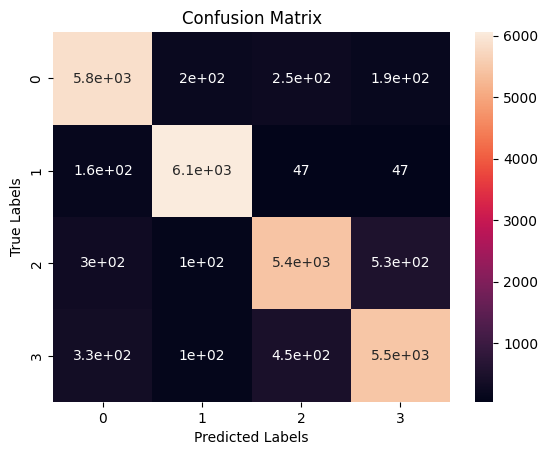

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_mat, annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

In [23]:
# Calculate class-wise accuracy
import numpy as np
class_accuracy = np.diagonal(confusion_mat) / np.sum(confusion_mat, axis=1)
print("class-wise accuracy")
class_accuracy

class-wise accuracy


array([0.90124788, 0.95975919, 0.85308874, 0.86070358])

In [24]:
# Identify misclassified instances
num_classes = len(confusion_mat)

misclassified_instances = []

for i in range(num_classes):
    for j in range(num_classes):
        if i != j and confusion_mat[i, j] > 0:
            misclassified_instances.append((i, j, confusion_mat[i, j]))
misclassified_instances

[(0, 1, 203),
 (0, 2, 252),
 (0, 3, 186),
 (1, 0, 160),
 (1, 2, 47),
 (1, 3, 47),
 (2, 0, 303),
 (2, 1, 100),
 (2, 3, 534),
 (3, 0, 333),
 (3, 1, 102),
 (3, 2, 448)]

In [25]:
# printing misclassified data
wrong_predictions = 0
for idx, _ in enumerate(y_pred):
  if df_test.iloc[idx]['Class Index'] != y_pred[idx]:
    print(df_test.iloc[idx]['text'] + "\n\n")
    wrong_predictions += 1

Streaming output truncated to the last 5000 lines.


ellison oracle will ship peoplesoft s next generation productssan franciscooracle corp will complete development and ship the next version of peoplesoft s flagship enterprise applications even if it ultimately succeeds in buying out its competitor 


stocks to watch on august reuters reuters u s stocks to watch cisco systems inc csco o cisco the world s largest maker of gear for directing internet traffic on monday distributed million merit based common stock options to employees including million to chief executive john chambers its shares ended at on nasdaq 


from shock winner to dignified loser gardner leaves stage a true lt b gt lt b gt the man who beat the man they said was the greatest wrestler the world has ever known felt his own tug of mortality here yesterday in a grey building on a scorching rubbish strewn hillside of broken down houses and a stray goat 


antitrust ruling reverberatesoracle corp was not the only benefici

In [26]:
# printing wrong predictions
wrong_predictions

2715

In [27]:
# common misclassification
common_misclassifications = sorted(misclassified_instances, key=lambda x: x[2], reverse=True)
common_misclassifications

[(2, 3, 534),
 (3, 2, 448),
 (3, 0, 333),
 (2, 0, 303),
 (0, 2, 252),
 (0, 1, 203),
 (0, 3, 186),
 (1, 0, 160),
 (3, 1, 102),
 (2, 1, 100),
 (1, 2, 47),
 (1, 3, 47)]

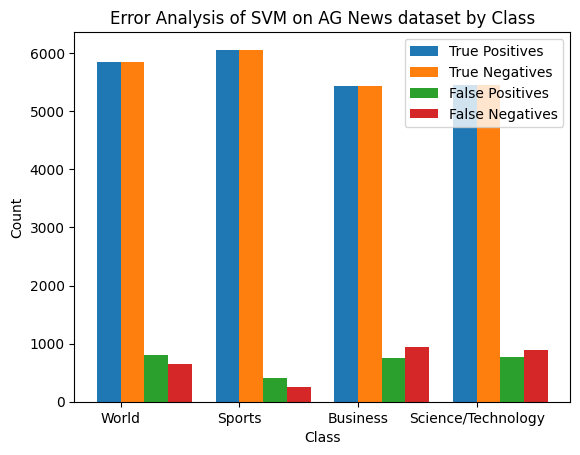

In [28]:
true_positives = np.diag(confusion_mat)
true_negatives = np.sum(confusion_mat) - np.sum(confusion_mat, axis=(0, 1)) + true_positives
false_positives = np.sum(confusion_mat, axis=0) - true_positives
false_negatives = np.sum(confusion_mat, axis=1) - true_positives

# Set the labels for x-axis
labels = ['World', 'Sports', 'Business', 'Science/Technology']

# Create the bar plot
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, true_positives, width, label='True Positives')
rects2 = ax.bar(x + width/2, true_negatives, width, label='True Negatives')
rects3 = ax.bar(x + width*1.5, false_positives, width, label='False Positives')
rects4 = ax.bar(x + width*2.5, false_negatives, width, label='False Negatives')

# Set plot title, legend, and axis labels
ax.set_title('Error Analysis of SVM on AG News dataset by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()